In [1]:
from scipy.interpolate import RegularGridInterpolator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(*l):
    return 2 * l[0]**2 + 3 * l[1]**2 - l[2] + 100*np.cos(l[0]*2) + 1/(l[1]*l[0]+0.1)


In [3]:
resolution_orig = 100
dimensions_orig = 3

xyz = np.array([np.linspace(0.0, 5, resolution_orig) for _ in range(dimensions_orig)])
xyz_g = np.meshgrid(*xyz, indexing='ij')

print(f"Data cube size: {np.prod(xyz_g[0].size):g}")

data = f(*xyz_g)

# data is now a 3-D array with data[i, j, k] = f(x[i], y[j], z[k]).

Data cube size: 1e+06


In [4]:
# Next, define an interpolating function from this data:

fill = None        # Extrapolate
method = "linear"  # “linear”, “nearest”,   spline methods: “slinear”, “cubic”, “quintic” and “pchip”.

interp = RegularGridInterpolator(xyz, data,
                                 fill_value=fill, bounds_error=False, method=method)

In [5]:
# evaluate interpolator
resolution_eval = 50
xyz_eval = [np.linspace(-2.0, 7, resolution_eval) for _ in range(dimensions_orig)]

# Evaluate the interpolator on the full 3D grid (keeps result for inspection)
XYZ_g = np.meshgrid(*xyz_eval, indexing='ij')


(50, 50)


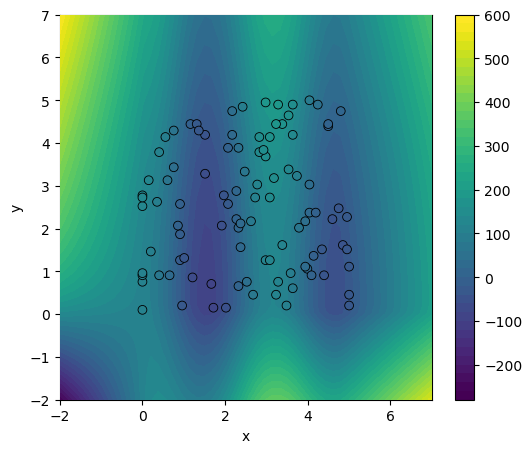

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))

# Choose a z-slice (middle slice) to plot using contourf
i = 10
z_mid = xyz_eval[2][i]

# Create evaluation grid for contour
x_plt = XYZ_g[0][:,:,i]
y_plt = XYZ_g[1][:,:,i]
z_plt = XYZ_g[2][:,:,i]
eval_at = np.array([x_plt.flatten(),y_plt.flatten(),z_plt.flatten()]).T
z_vals = interp( eval_at )

z_plt = np.reshape(z_vals, XYZ_g[2].shape[:-1])
print(z_plt.shape)

# Match color scale between contour and scatter using vmin/vmax
vmin, vmax = np.amin(z_plt), np.amax(z_plt)
cf = ax.contourf(x_plt, y_plt, z_plt, levels=50, cmap='viridis', vmin=vmin, vmax=vmax,zorder=8)
fig.colorbar(cf, ax=ax)

# Overlay original data points projected to the nearest original z-plane
k = np.argmin(np.abs(xyz[2] - z_mid))
Xo, Yo = np.meshgrid(xyz[0], xyz[1], indexing='ij')
Zo = data[:,:, k]

# Scatter original grid point samples, to validate
plt_samp = np.random.randint(0, np.prod(Zo.shape), 100)
x_scat = Xo.flatten()[plt_samp]
y_scat = Yo.flatten()[plt_samp]
z_scat = Zo.flatten()[plt_samp]
sc = ax.scatter(x_scat, y_scat, c=z_scat, cmap='viridis', marker='o',
                vmin=vmin, vmax=vmax, edgecolor='k', s=40, linewidth=0.6, zorder=10)

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()